In [17]:
import os
import pandas as pd
import numpy as np

from tqdm import tqdm
tqdm.pandas()

import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm

font_path = 'C:\\Windows\\Fonts\\gulim.ttc'
font = fm.FontProperties(fname=font_path).get_name()
mpl.rc('font', family=font)

In [18]:
path = '../Data/Preprocessed/사용자분석.csv'

df_sales_origin = pd.read_csv(path)
df_sales_origin['날짜'] = pd.to_datetime(df_sales_origin['날짜'], format = '%Y-%m-%d')

In [19]:
print(df_sales_origin['날짜'].min())
print(df_sales_origin['날짜'].max())

2019-12-17 00:00:00
2023-10-31 00:00:00


In [20]:
df_sales_origin['시'].unique()

array(['부여군', '대전', '논산시', '청양군', '공주시', '수원시', '홍천군', '포천시', '서울', '광주',
       '화성시', '인천', '청주시', '김제시', '세종', '안산시', '경산시', '대구', '서천군', '익산시',
       '성남시', '서산시', '보령시', '군포시', '군산시', '홍성군', '계룡시', '정읍시', '천안시',
       '오산시', '아산시', '속초시', '울산', '평택시', '안성시', '광명시', '남양주시', '전주시',
       '당진시', '남원시', '용인시', '통영시', '원주시', '시흥시', '영동군', '김포시', '제천시',
       '여수시', '고양시', '하남시', '부산', '정선군', '금산군', '의정부시', '옥천군', '과천시',
       '사천시', '구리시', '음성군', '여주시', '의왕시', '창원시', '나주시', '예천군', '양주시',
       '안양시', '완주군', '울릉군', '예산군', '임실군', '태안군', '안동시', '목포시', '영주시',
       '양산시', '거제시', '부안군', '김해시', '진천군', '보은군', '부천시', '밀양시', '이천시',
       '제주시', '광주시', '강릉시', '영암군', '파주시', '고흥군', '포항시', '함안군', '진주시',
       '산청군', '거창군', '고창군', '동두천시', '화천군', '무안군', '해남군', '구미시', '성주군',
       '춘천시', '양평군', '달성군', '무주군', '강동구', '상주시', '옹진군', '양구군', '경주시',
       '영광군', '서귀포시', '순창군', '기장군', '장흥군', '평창군', '동해시', '순천시', '함양군',
       '태백시', '증평군', '광양시', '강화군', '단양군', '사하구', '충주시', '울주군', '담양군'],
      dty

In [21]:
df_sales_origin['지역구분2'] = df_sales_origin['도']
df_sales_origin.loc[(df_sales_origin['시'] == '부여군'), '지역구분2'] = '부여군'
df_sales_origin.loc[(df_sales_origin['도'] == '충남') & (df_sales_origin['시'] != '부여군'), '지역구분2'] = '충남'

In [6]:
# 사용자 거주지 기반 굿뜨래페이 사용금액 분석(2019/12 ~ 2023/10)
tmp = df_sales_origin.groupby(['지역구분2'])['사용금액'].sum().sort_values(ascending = False)
tmp = tmp.reset_index()

tmp['비율'] = round(tmp['사용금액'] / tmp['사용금액'].sum() * 100, 1)
tmp['비율(부여 제외)'] = round(tmp['사용금액'] / (tmp.iloc[1:, 1].sum()) * 100, 1)

In [7]:
df_sales_origin['지역구분3'] = df_sales_origin['지역구분2']
df_sales_origin.loc[(df_sales_origin['도'].isin(['대전', '세종'])), '지역구분3'] = '충남권'
df_sales_origin.loc[(df_sales_origin['지역구분2'] != '부여군') & (df_sales_origin['도'] == '충남'), '지역구분3'] = '충남권'
df_sales_origin.loc[(df_sales_origin['도'].isin(['경기', '서울'])), '지역구분3'] = '수도권'
df_sales_origin.loc[(~df_sales_origin['지역구분3'].isin(['충남권', '수도권', '부여군'])), '지역구분3'] = '기타'

In [8]:
df_sales_origin.head(2)

,사용자코드,연도,분기,월,날짜,요일,시간대명,성별,연령대,나이,...,읍/면,가맹점명,골목상권분류,대분류,중분류,소분류,가맹점 주소,가맹가입일자,지역구분2,지역구분3
0,차기순01041235434,2019년,4,12월,2019-12-26,목,12시~17:59분,여자,40대,40.0,...,부여읍,문광사,기타,기타,기타,기타,부여읍,2019-11-05,부여군,부여군
1,차기순01041235434,2020년,1,1월,2020-01-07,화,18시~23시59분,여자,40대,41.0,...,부여읍,문광사,기타,기타,기타,기타,부여읍,2019-11-05,부여군,부여군


In [167]:
# 지역구분 및 월별 굿뜨래페이 사용금액 추이(2019/12 ~ 2023/10)
tmp = df_sales_origin.set_index('날짜')
tmp2 = tmp.groupby(['지역구분3']).resample('1m')['사용금액'].sum().reset_index()
tmp2['날짜'] = tmp2['날짜'].apply(lambda x : str(x.year) + '/' + str(x.month).zfill(2))

tmp2_pivot = tmp2.pivot_table(index = ['지역구분3'], columns = ['날짜'], values = ['사용금액']).fillna(0).reset_index()
# tmp2_pivot.to_csv('../Result/0200. 신규 사용자 획득방안/Data/지역구분의 월별 사용금액합계.csv', index = False, encoding = 'utf-8-sig')

In [9]:
# 관광객과 관계인구 구분 전처리
tmp = df_sales_origin.loc[(df_sales_origin['지역구분3'] != '부여군')]
tmp = tmp.sort_values(by = ['사용자코드', '날짜'], ascending = True)
tmp = tmp.loc[(tmp['날짜'] >= pd.to_datetime('20200101', format = '%Y%m%d'))]

In [10]:
def slidingDate(listDate):
    first_date = []
    start_date = listDate[0]
    tmp_date = listDate[0]
    for i, date in enumerate(listDate):
        if i == 0:
            first_date.append(start_date)

        else:
            if date == (tmp_date + pd.Timedelta('1d')):
                first_date.append(start_date)
            else:
                first_date.append(date)
                start_date = date
            tmp_date = date
    return first_date

In [11]:
def findFirstDate(x):
    listDate = sorted(list(set(x.loc[:, '날짜'])))
    first_date = slidingDate(listDate)
    tmp_df = pd.DataFrame({'날짜' : listDate,
                           'firstDate' : first_date})
    x = x.merge(tmp_df, on = '날짜', how = 'left')
    return x

In [12]:
df_list = []
df_name_list = []
for place in sorted(tmp['지역구분3'].unique().tolist()):
    for year in range(2020, 2024):
        tmp_tmp = tmp.loc[(tmp['날짜'].dt.year == year) & (tmp['지역구분3'] == place)]
        df = tmp_tmp.groupby(['사용자코드']).progress_apply(lambda x : findFirstDate(x).reset_index(drop = True)).reset_index(drop = True)
        df_list.append(df)
        df_name_list.append(f'{place}__{year}')

  0%|          | 0/85 [00:00<?, ?it/s]

100%|██████████| 1792/1792 [00:06<00:00, 260.96it/s]


In [13]:
def categoryTravelRange(x):
    lenDate = len(x.unique())
    if lenDate == 1:
        return '당일'
    else:
        return '1박2일 이상'

In [14]:
result_list = []

for df, name in zip(df_list, df_name_list):
    tmp = df.groupby(['사용자코드', 'firstDate'])['날짜'].progress_apply(lambda x : categoryTravelRange(x)).reset_index()
    tmp = tmp.rename(columns = {'날짜' : '방문구분'})
    tmp['name'] = name
    df = df.merge(tmp, on = ['사용자코드', 'firstDate'], how = 'left')
    result_list.append(df)

100%|██████████| 20849/20849 [00:02<00:00, 10281.58it/s]


In [15]:
def outlier(x, year):
    q1 = x['firstDate'].quantile(0.25)
    q3 = x['firstDate'].quantile(0.75)
    iqr = q3-q1

    x.loc[(x['firstDate'] < (q3 + iqr*1.5)), 'outlier'] = False
    print(f'{year} : outlier 기준:', round(q3 + iqr*1.5) )
    return x

In [16]:
df_list = []
for year, result_df in zip(df_name_list, result_list):
    tmp = result_df.groupby(['사용자코드'])['firstDate'].nunique().reset_index()
    tmp['outlier'] = True
    tmp = outlier(tmp, year)
    tmp['name'] = year
    df_list.append(tmp)

기타__2020 : outlier 기준: 16
기타__2021 : outlier 기준: 16
기타__2022 : outlier 기준: 20
기타__2023 : outlier 기준: 14
수도권__2020 : outlier 기준: 7
수도권__2021 : outlier 기준: 11
수도권__2022 : outlier 기준: 6
수도권__2023 : outlier 기준: 6
충남권__2020 : outlier 기준: 48
충남권__2021 : outlier 기준: 46
충남권__2022 : outlier 기준: 38
충남권__2023 : outlier 기준: 34


In [17]:
last_list = []

for result_df, df in zip(result_list, df_list):
    df = df.rename(columns = {'firstDate' : '총 방문횟수'})
    last_list.append(result_df.merge(df, on = ['사용자코드', 'name'], how = 'left'))
last_df = pd.concat(last_list, axis = 0, ignore_index = True)

평균 방문횟수: 7.11
평균 방문횟수: 8.08
평균 방문횟수: 9.71
평균 방문횟수: 6.91
평균 방문횟수: 4.67
평균 방문횟수: 5.21
평균 방문횟수: 5.35
평균 방문횟수: 5.2
평균 방문횟수: 13.74
평균 방문횟수: 14.57
평균 방문횟수: 13.29
평균 방문횟수: 11.63


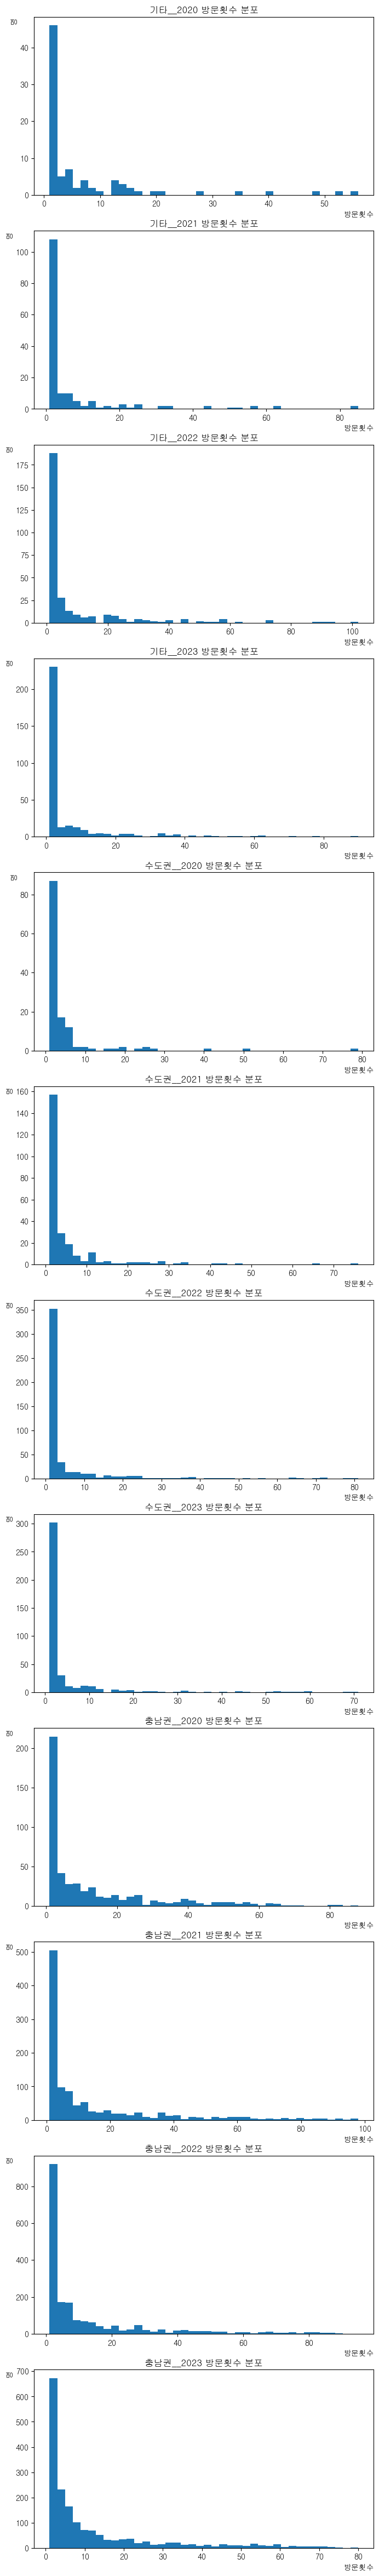

In [18]:
fig, axes = plt.subplots(len(df_list), 1, figsize = (8, 60))

for i, (year, df) in enumerate(zip(df_name_list, df_list)):

    axes[i].set_title(f'{year} 방문횟수 분포')
    axes[i].hist(df['firstDate'], bins = 40)
    axes[i].set_ylabel('명', loc = 'top')
    axes[i].set_xlabel('방문횟수', loc = 'right')

    print('평균 방문횟수:', round(df['firstDate'].mean(), 2))

In [19]:
df_list = []
for year, result_df in zip(df_name_list, result_list):
    tmp = result_df.groupby(['사용자코드'])['firstDate'].nunique().reset_index()
    tmp['outlier'] = True

    tmp = outlier(tmp, year)
    df_list.append(tmp)

기타__2020 : outlier 기준: 16
기타__2021 : outlier 기준: 16
기타__2022 : outlier 기준: 20
기타__2023 : outlier 기준: 14
수도권__2020 : outlier 기준: 7
수도권__2021 : outlier 기준: 11
수도권__2022 : outlier 기준: 6
수도권__2023 : outlier 기준: 6
충남권__2020 : outlier 기준: 48
충남권__2021 : outlier 기준: 46
충남권__2022 : outlier 기준: 38
충남권__2023 : outlier 기준: 34


평균 방문횟수: 7.11
평균 방문횟수: 8.08
평균 방문횟수: 9.71
평균 방문횟수: 6.91
평균 방문횟수: 4.67
평균 방문횟수: 5.21
평균 방문횟수: 5.35
평균 방문횟수: 5.2
평균 방문횟수: 13.74
평균 방문횟수: 14.57
평균 방문횟수: 13.29
평균 방문횟수: 11.63


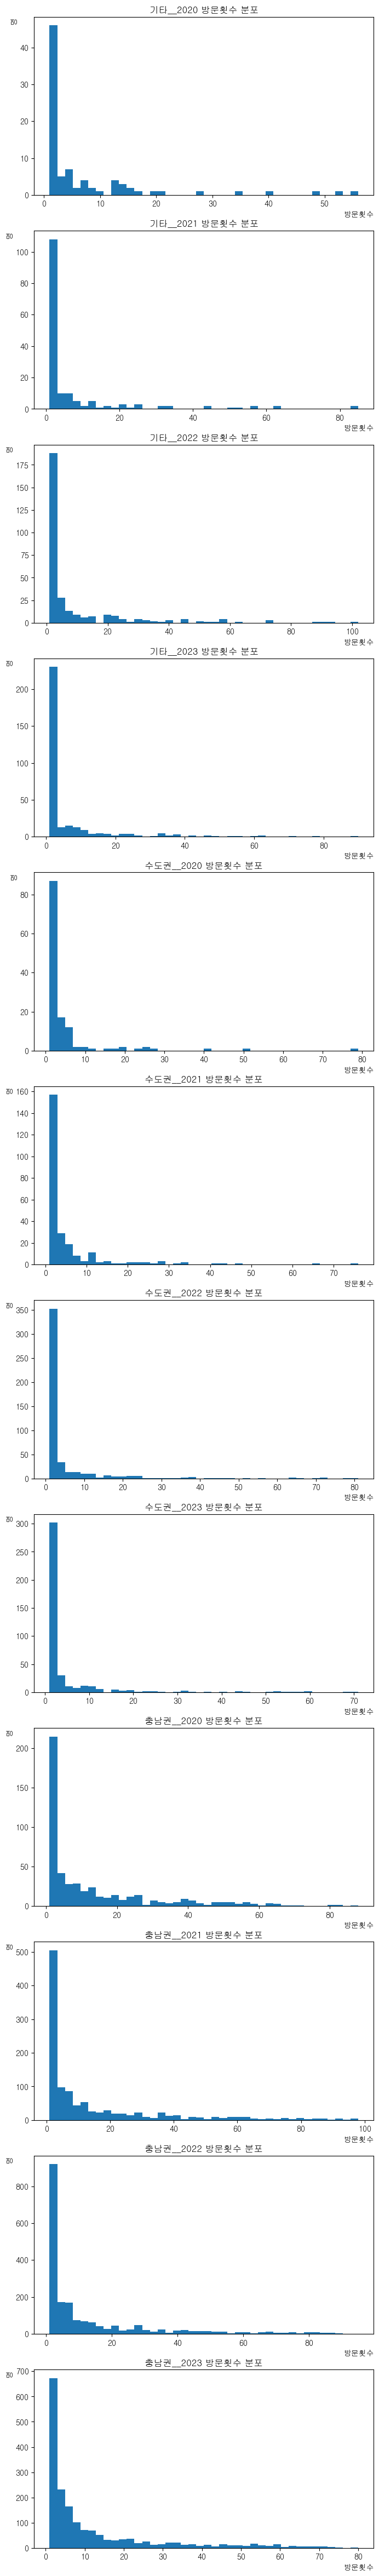

In [20]:
fig, axes = plt.subplots(len(df_list), 1, figsize = (8, 60))

for i, (year, df) in enumerate(zip(df_name_list, df_list)):
    axes[i].set_title(f'{year} 방문횟수 분포')
    axes[i].hist(df['firstDate'], bins = 40)
    axes[i].set_ylabel('명', loc = 'top')
    axes[i].set_xlabel('방문횟수', loc = 'right')

    print('평균 방문횟수:', round(df['firstDate'].mean(), 2))

In [31]:
metro_df = last_df.loc[last_df['name'].str.contains('수도권')]
remain_df = last_df.loc[last_df['name'].str.contains('기타')]

# metro_df.to_csv('../Result/0200. 신규 사용자 획득방안/Data/수도권 권역.csv', index = False, encoding = 'utf-8-sig', escapechar = '\\')
# remain_df.to_csv('../Result/0200. 신규 사용자 획득방안/Data/기타 권역.csv', index = False, encoding = 'utf-8-sig', escapechar = '\\')

# 수도권 권역 및 기타 권역 구분

1. 우선 수도권 권역과 기타 권역의 관광객, 관계인구 구분작업
2. 수도권의 전체 매출, 사용자, 추이 등
3. 수도권의 관광객, 관계인구 비중 변화 표를 하나의 장표에 작업
4. 기타 권역의 전체 매출, 사용자, 추이 등
5. 기타 권역의 관광객, 관계인구 비중 변화 표를 하나의 장표에 작업
6. 연령별, 지역별 가장 많이 쓰이는 가맹점. + 건수, 등등 

In [2]:
metro_df = pd.read_csv('../Result/0200. 신규 사용자 획득방안/Data/수도권 권역.csv')
remain_df = pd.read_csv('../Result/0200. 신규 사용자 획득방안/Data/기타 권역.csv')

### 수도권역

In [10]:
replace_age = {'10대' : '10~20대',
               '20대' : '10~20대',
               '30대' : '30~40대',
               '40대' : '30~40대',
               '50대' : '50대 이상',
               '60대' : '50대 이상',
               '70대이상' : '50대 이상'
               }

metro_df['신규_연령대'] = metro_df['연령대'].apply(lambda x : replace_age[x])

In [11]:
# outlier, 방문구분, 연령, 대분류별 총 사용금액
basic_column = ['신규_연령대', 'outlier', '방문구분']

tmp01 = metro_df.groupby(basic_column + ['대분류'])['사용금액'].sum().reset_index().rename(columns = {'사용금액' : '총사용금액'})
tmp02 = metro_df.groupby(basic_column + ['대분류']).agg({'사용자코드' : ['nunique', 'count']})
tmp02.columns = ['고유사용자수', '사용건수']
tmp02 = tmp02.reset_index()
tmp03 = metro_df.groupby(basic_column).agg({'사용자코드' : ['nunique', 'count']})
tmp03.columns = ['총고유사용자수', '총사용건수']
tmp03 = tmp03.reset_index()
tmp04 = metro_df.groupby(basic_column + ['대분류', '가맹점명'])['사용자코드'].nunique().reset_index().sort_values(by = basic_column + ['대분류', '사용자코드'], ascending = False).groupby(basic_column + ['대분류']).apply(lambda x : x.loc[(x['사용자코드'] != 1), '가맹점명'].tolist()[:3])
tmp04 = tmp04.reset_index()
tmp04.columns = [column if i != len(tmp04.columns) - 1 else '최빈 가맹점명' for i, column in enumerate(tmp04.columns)]
tmp04['최빈 가맹점 1'] = tmp04['최빈 가맹점명'].apply(lambda x : x[0] if len(x) >= 1 else np.nan)
tmp04['최빈 가맹점 2'] = tmp04['최빈 가맹점명'].apply(lambda x : x[1] if len(x) >= 2 else np.nan)
tmp04['최빈 가맹점 3'] = tmp04['최빈 가맹점명'].apply(lambda x : x[2] if len(x) >= 3 else np.nan)

tmp01 = tmp01.merge(tmp02, on = basic_column + ['대분류'], how = 'left')
tmp01 = tmp01.merge(tmp03, on = basic_column, how = 'left')

tmp01['인당평균사용금액'] = round(tmp01['총사용금액'] / tmp01['고유사용자수'])
tmp01['건당평균사용금액'] = round(tmp01['총사용금액'] / tmp01['사용건수'])
tmp01['고유사용자비율'] = round(tmp01['고유사용자수'] / tmp01['총고유사용자수'] * 100)
tmp01['사용건수비율'] = round(tmp01['사용건수'] / tmp01['총사용건수'] * 100)

tmp01 = tmp01.merge(tmp04[basic_column + ['대분류', '최빈 가맹점 1', '최빈 가맹점 2', '최빈 가맹점 3']],
                    on = basic_column + ['대분류'], 
                    how = 'left')

tmp01.sort_values(by = basic_column + ['총고유사용자수', '고유사용자비율', '인당평균사용금액'],
                  ascending = False).to_csv('../Result/0200. 신규 사용자 획득방안/Data/수도권_가맹점대분류별 사용현황.csv',
                                             index = False, encoding = 'utf-8-sig')

### 기타 권역

In [12]:
replace_age = {'10대' : '10~20대',
               '20대' : '10~20대',
               '30대' : '30~40대',
               '40대' : '30~40대',
               '50대' : '50대 이상',
               '60대' : '50대 이상',
               '70대이상' : '50대 이상'
               }

remain_df['신규_연령대'] = remain_df['연령대'].apply(lambda x : replace_age[x])

In [13]:
# outlier, 방문구분, 연령, 대분류별 총 사용금액
basic_column = ['신규_연령대', 'outlier', '방문구분']

tmp01 = remain_df.groupby(basic_column + ['대분류'])['사용금액'].sum().reset_index().rename(columns = {'사용금액' : '총사용금액'})
tmp02 = remain_df.groupby(basic_column + ['대분류']).agg({'사용자코드' : ['nunique', 'count']})
tmp02.columns = ['고유사용자수', '사용건수']
tmp02 = tmp02.reset_index()
tmp03 = remain_df.groupby(basic_column).agg({'사용자코드' : ['nunique', 'count']})
tmp03.columns = ['총고유사용자수', '총사용건수']
tmp03 = tmp03.reset_index()
tmp04 = remain_df.groupby(basic_column + ['대분류', '가맹점명'])['사용자코드'].nunique().reset_index().sort_values(by = basic_column + ['대분류', '사용자코드'], ascending = False).groupby(basic_column + ['대분류']).apply(lambda x : x.loc[(x['사용자코드'] != 1), '가맹점명'].tolist()[:3])
tmp04 = tmp04.reset_index()
tmp04.columns = [column if i != len(tmp04.columns) - 1 else '최빈 가맹점명' for i, column in enumerate(tmp04.columns)]
tmp04['최빈 가맹점 1'] = tmp04['최빈 가맹점명'].apply(lambda x : x[0] if len(x) >= 1 else np.nan)
tmp04['최빈 가맹점 2'] = tmp04['최빈 가맹점명'].apply(lambda x : x[1] if len(x) >= 2 else np.nan)
tmp04['최빈 가맹점 3'] = tmp04['최빈 가맹점명'].apply(lambda x : x[2] if len(x) >= 3 else np.nan)

tmp01 = tmp01.merge(tmp02, on = basic_column + ['대분류'], how = 'left')
tmp01 = tmp01.merge(tmp03, on = basic_column, how = 'left')

tmp01['인당평균사용금액'] = round(tmp01['총사용금액'] / tmp01['고유사용자수'])
tmp01['건당평균사용금액'] = round(tmp01['총사용금액'] / tmp01['사용건수'])
tmp01['고유사용자비율'] = round(tmp01['고유사용자수'] / tmp01['총고유사용자수'] * 100)
tmp01['사용건수비율'] = round(tmp01['사용건수'] / tmp01['총사용건수'] * 100)

tmp01 = tmp01.merge(tmp04[basic_column + ['대분류', '최빈 가맹점 1', '최빈 가맹점 2', '최빈 가맹점 3']],
                    on = basic_column + ['대분류'], 
                    how = 'left')

tmp01.sort_values(by = basic_column + ['총고유사용자수', '고유사용자비율', '인당평균사용금액'],
                  ascending = False).to_csv('../Result/0200. 신규 사용자 획득방안/Data/기타_가맹점대분류별 사용현황.csv',
                                             index = False, encoding = 'utf-8-sig')

In [14]:
tmp01.head(2)

,신규_연령대,outlier,방문구분,대분류,총사용금액,고유사용자수,사용건수,총고유사용자수,총사용건수,인당평균사용금액,건당평균사용금액,고유사용자비율,사용건수비율,최빈 가맹점 1,최빈 가맹점 2,최빈 가맹점 3
0,10~20대,False,1박2일 이상,관광/여가/오락,117000,4,6,47,540,29250.0,19500.0,9.0,1.0,NaN,NaN,NaN
1,10~20대,False,1박2일 이상,기부,10335,2,2,47,540,5168.0,5168.0,4.0,0.0,NaN,NaN,NaN


# 충남권 분석

In [138]:
df_sales = df_sales_origin.copy()
df_sales = df_sales.loc[(df_sales['도'].isin(['충남', '대전', '세종'])) & (df_sales['시'] != '부여군')]

replace_city = {'부여인근지역' : ['청양군', '논산시', '공주시', '서천군', '보령시'],
                '충남기타지역' : ['홍성군', '당진시', '예산군', '금산군', '서산시', '태안군', '아산시'],
                '충남대도시' : ['세종시', '계룡시', '천안시', '대전', '세종']}

def replace_city_func(x, replace_city):
    for key, item in replace_city.items():
        if x in item:
            return key
    return '삭제'


df_sales['지역구분4'] = df_sales['시'].apply(lambda x : replace_city_func(x, replace_city))
df_sales = df_sales.loc[(df_sales['지역구분4'] != '삭제') & (df_sales['연도'] != '2019년')]
# df_sales.to_excel('../Result/0200. 신규 사용자 획득방안/Data/지역구분_충남_원본.xlsx', sheet_name = '원본 데이터', index = False)

In [64]:
path = '../Result/0200. 신규 사용자 획득방안/Data/지역구분_충남_원본.xlsx'
df_sales = pd.read_excel(path, sheet_name = '원본 데이터')

ValueError: Worksheet named '원본 데이터' not found

In [50]:
df = df_sales.copy()
df = df.groupby(['지역구분4', '시', '연도'])['사용금액'].sum().reset_index().pivot_table(index = ['지역구분4', '시'], columns = ['연도'], values = ['사용금액']).fillna(0)
df.columns = [column[1] for column in df.columns]

In [51]:
tmp = pd.DataFrame()

for i in range(len(df.columns) - 1):
    column1 = df.columns[i]
    column2 = df.columns[i + 1]

    tmp[f'{column2}-{column1} 변화율'] = round((df[column2] - df[column1]) / df[column1] * 100, 1)

for column in df.columns:
    df[f'{column} 사용금액 비율'] = round(df[column] / df[column].sum() * 100, 1)

df = pd.concat([df, tmp], axis = 1)
df = df.reset_index()

df['총합계 사용금액'] = df[['2020년', '2021년', '2022년', '2023년']].sum(axis = 1)
df['총합계 사용금액 비율'] = round(df['총합계 사용금액'] / df['총합계 사용금액'].sum() * 100, 1)
df = df.groupby(['지역구분4']).apply(lambda x : x.sort_values(by = ['총합계 사용금액'], ascending = False)).reset_index(drop = True)

# df.to_excel(path, index = False, sheet_name = '충남사용금액')

In [91]:
tmp = df_sales.copy()

tmp = tmp.groupby(['지역구분4', '가맹점 주소'])['사용금액'].sum().reset_index().pivot_table(index = ['가맹점 주소'], columns = ['지역구분4'], values = ['사용금액']).fillna(0)
tmp.columns = [columns[1] for columns in tmp.columns]
tmp['총합계'] = tmp.sum(axis = 1)
tmp = tmp.sort_values(by = ['총합계'], ascending = False)
for column in tmp.columns:
    tmp[f'{column}_비중'] = round((tmp[column] / tmp[column].sum() * 100), 1)

tmp.loc['합계', :] = tmp.sum(axis = 0)

with pd.ExcelWriter('../Result/0200. 신규 사용자 획득방안/Data/지역구분_충남.xlsx', mode = 'a') as writer:
    tmp.reset_index().to_excel(writer, sheet_name = '부여지역별', index = False)

In [109]:
df_sales.columns

Index(['사용자코드', '연도', '분기', '월', '날짜', '요일', '시간대명', '성별', '연령대', '나이',
       '사용자 주소', '가맹점 사업자 번호', '가맹점 사업자 업종', '사용금액', '시', '도', '읍/면', '가맹점명',
       '골목상권분류', '대분류', '중분류', '소분류', '가맹점 주소', '가맹가입일자', '지역구분4'],
      dtype='object')

In [127]:
tmp = df_sales.copy()
tmp = tmp.groupby(['지역구분4', '대분류'])['사용금액'].sum().reset_index().pivot_table(index = ['대분류'], columns = ['지역구분4'], values = ['사용금액']).fillna(0)
tmp.columns = [columns[1] for columns in tmp.columns]
tmp['총합계'] = tmp.sum(axis = 1)

tmp = tmp.loc[(tmp.index != '기타')]

for column in tmp.columns:
    tmp[f'{column}_비중'] = round((tmp[column] / tmp[column].sum() * 100), 1)

tmp = tmp.sort_values(by = ['총합계_비중'], ascending = False)

tmp.loc['합계', :] = tmp.sum(axis = 0)
tmp = tmp.reset_index()

with pd.ExcelWriter('../Result/0200. 신규 사용자 획득방안/Data/지역구분_충남.xlsx', mode = 'a') as writer:
    tmp.to_excel(writer, sheet_name = '업종별', index = False)

In [133]:
tmp = df_sales.copy()
tmp = tmp.groupby(['지역구분4', '연령대'])['사용금액'].sum().reset_index().pivot_table(index = ['연령대'], columns = ['지역구분4'], values = ['사용금액']).fillna(0)
tmp.columns = [columns[1] for columns in tmp.columns]
tmp['총합계'] = tmp.sum(axis = 1)

for column in tmp.columns:
    tmp[f'{column}_비중'] = round((tmp[column] / tmp[column].sum() * 100), 1)

tmp = tmp.sort_values(by = ['총합계_비중'], ascending = False)

tmp.loc['합계', :] = tmp.sum(axis = 0)
tmp = tmp.reset_index()

with pd.ExcelWriter('../Result/0200. 신규 사용자 획득방안/Data/지역구분_충남.xlsx', mode = 'a') as writer:
    tmp.to_excel(writer, sheet_name = '연령별', index = False)

In [144]:
tmp = df_sales.copy()
tmp = tmp.groupby(['지역구분4', '연령대', '대분류'])['사용금액'].sum().reset_index().pivot_table(index = ['지역구분4', '연령대'], columns = ['대분류'], values = ['사용금액']).fillna(0)
tmp.columns = [columns[1] for columns in tmp.columns]
# tmp['총합계'] = tmp.sum(axis = 1)

# round(tmp / tmp.sum(axis = 1))

# for column in tmp.columns:
#     tmp[f'{column}_비중'] = round((tmp[column] / tmp[column].sum(axis = 1) * 100), 1)

# tmp = tmp.sort_values(by = ['총합계_비중'], ascending = False)

# tmp.loc['합계', :] = tmp.sum(axis = 0)
# tmp = tmp.reset_index()

# with pd.ExcelWriter('../Result/0200. 신규 사용자 획득방안/Data/지역구분_충남.xlsx', mode = 'a') as writer:
    # tmp.to_excel(writer, sheet_name = '연령 및 업종별', index = False)

In [142]:
tmp

관광/여가/오락         기부           기타         농업관련         대형마트  \
지역구분4  연령대                                                                  
부여인근지역 10대      40000.0     1204.0    9080753.0          0.0     983940.0   
       20대     365000.0        0.0  106036491.0    2200000.0   44515145.0   
       30대    1000500.0  2072874.0  209991602.0    5475880.0   74210811.0   
       40대    3741500.0     5760.0  320748912.0   23612300.0  103471033.0   
       50대     380000.0   150000.0  247970869.0   35445160.0  164669038.0   
       60대      92000.0        0.0  321297777.0  105436440.0  120878420.0   
       70대이상   940000.0      122.0   38284435.0    1929500.0   28609240.0   
충남기타지역 10대          0.0        0.0    2130900.0          0.0          0.0   
       20대      33000.0        0.0   24932498.0          0.0    1239830.0   
       30대    2071600.0   109886.0   55625288.0          0.0    3285430.0   
       40대    3640000.0        0.0   90875780.0    1146820.0   19768840.0   
       50대          0.0     1200.0   43260727.0      65800.0    8484460.0   
       60대          0.0        0.0   12687475.0      11000.0     268990.0   
       70대이상        0.0        0.0      32000.0          0.0     254380.0   
충남대도시  10대          0.0     6040.0   11063929.0          0.0     995090.0   
       20대     539000.0     2331.0  107342035.0    3133300.0    9827050.0   
       30대     326000.0    54480.0  152319038.0     186000.0   35127301.0   
       40대    2153200.0   113673.0  156221873.0     787500.0   93428522.0   
       50대    6297000.0    17718.0  133080796.0    4282695.0   71989070.0   
       60대      90000.0        0.0   38509178.0    2747250.0   32505580.0   
       70대이상        0.0        0.0   10173250.0      51000.0    8418450.0   

                      병원        부동산      생활서비스          소매        스포츠  \
지역구분4  연령대                                                              
부여인근지역 10대     1062700.0        0.0    75000.0    877900.0        0.0   
       20대     5434300.0        0.0  2478500.0  17151840.0        0.0   
       30대    11644620.0        0.0  2645240.0  49691460.0  1776000.0   
       40대    49610020.0        0.0  6484300.0  57608940.0  1153000.0   
       50대    83852280.0        0.0  7314550.0  84969650.0  3496000.0   
       60대    70308030.0  3600000.0  5167398.0  73016498.0  3610000.0   
       70대이상  20847460.0        0.0   210000.0  15207160.0        0.0   
충남기타지역 10대           0.0        0.0        0.0     92550.0        0.0   
       20대      228600.0        0.0    35500.0    139580.0        0.0   
       30대      127800.0        0.0   308500.0   1747020.0   130000.0   
       40대     4088200.0        0.0   475000.0   2540910.0        0.0   
       50대     1734750.0        0.0   192000.0   7207500.0        0.0   
       60대      738280.0        0.0        0.0      8550.0        0.0   
       70대이상         0.0        0.0        0.0     17900.0        0.0   
충남대도시  10대      196300.0        0.0   334000.0   1003450.0        0.0   
       20대    13369940.0        0.0  1838000.0  27801713.0   208000.0   
       30대    16132818.0  1800000.0  1085000.0  47786115.0   250000.0   
       40대    51817090.0        0.0  3400300.0  35478060.0   296000.0   
       50대    20134350.0        0.0  5016500.0  64351820.0   886992.0   
       60대    18100730.0        0.0   714000.0  16205326.0   140000.0   
       70대이상  16313090.0        0.0   434000.0  18443250.0        0.0   

                       음식          자동차         종교      학문/교육  
지역구분4  연령대                                                    
부여인근지역 10대      1708130.0    2739000.0        0.0  1405000.0  
       20대     80005330.0   40451340.0    55000.0  1453000.0  
       30대    141618242.0   88808583.0        0.0  1139000.0  
       40대    159182682.0  136467947.0  1769500.0  4103000.0  
       50대    143391764.0  123703134.0   317000.0  1558000.0  
       60대    123261960.0   94791039.0   275400.0  2091000.0  
       70대이상   14183432.0   15202969.0        0.0     8000.

In [140]:
tmp = df_sales.groupby(['연도', '지역구분4', '시']).agg({'사용금액' : ['sum', 'mean'],
                                                        '사용자코드' : 'nunique'})
tmp.columns = ['총 사용금액', '1회당 평균 사용금액', '고유 사용자 수']
tmp = tmp.reset_index()
tmp['1회당 평균 사용금액'] = tmp['1회당 평균 사용금액'].astype(int)
tmp_pivot = tmp.pivot_table(index = ['지역구분4', '시'], columns = ['연도'], values = ['총 사용금액', '1회당 평균 사용금액', '고유 사용자 수']).fillna(0)
# tmp_pivot.to_excel('../Result/0200. 신규 사용자 획득방안/Data/충남지역구분.xlsx', sheet_name = '기초 3종')

tmp2 = tmp.groupby(['연도', '지역구분4']).agg({'총 사용금액' : 'sum',
                                              '고유 사용자 수' : 'sum'}).reset_index()
tmp2_pivot = tmp2.pivot_table(index = ['지역구분4'], columns = ['연도'], values = ['총 사용금액', '고유 사용자 수']).fillna(0)
# tmp2_pivot.to_excel('../Result/0200. 신규 사용자 획득방안/Data/충남지역구분.xlsx', sheet_name = '기초 3종(집계)')